In [31]:
from tensorflow import keras


In [32]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [33]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [34]:
import pandas as pd
df_target = pd.DataFrame(train_target)
df_target.value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [35]:
test_input.shape

(10000, 28, 28)

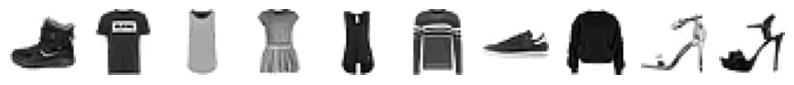

In [36]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r: 현재색반전  0  255
    axs[i].axis('off')                          # 그래프의 눈금을 제거
plt.show()    

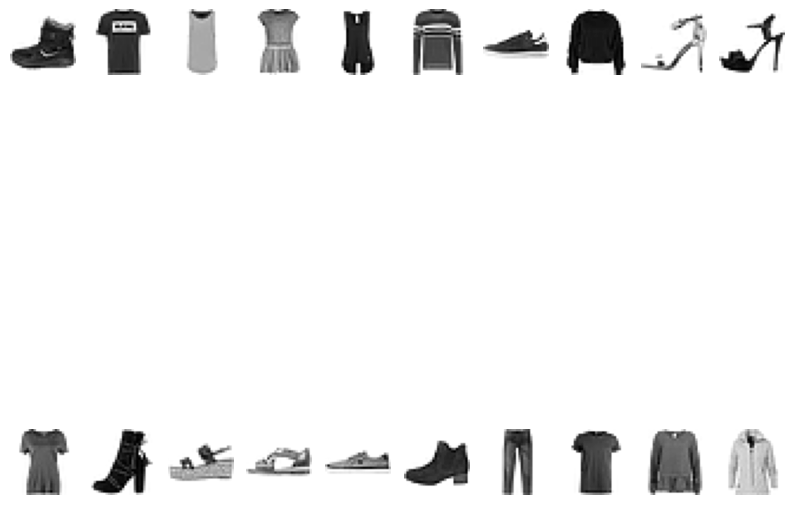

In [37]:
# 두줄을 출력해보세요.
import matplotlib.pyplot as plt

fig,axs = plt.subplots(2,10,figsize=(10,10))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r') # gray_r: 현재색반전  0  255
        axs[i,j].axis('off')                          # 그래프의 눈금을 제거
plt.show()   

In [38]:
import pandas as pd
df_target = pd.DataFrame(train_target)
df_target.value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [39]:
import numpy as np
np.unique(train_target,return_counts=True) 
# train_target데이터의 유일한 값 추출, return_counts : 각각의 유일값의 개수 리턴

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [40]:
# 안에 있는 데이터를 0-1의 값으로 변경
train_scaled = train_input/255
train_scaled[0]
test_scaled = test_input/255
test_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [41]:
28*28

784

In [42]:
train_scaled = train_scaled.reshape(-1,28*28) # 784개 1개 묶음으로 변경
train_scaled[0]
test_scaled = test_scaled.reshape(-1,28*28) # 784개 1개 묶음으로 변경
test_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
# test_input - 784개의 그룹으로 묶어서 

# 경사하강법을 사용해서 패션 아이템을 분류하시오.

In [54]:
# 경사하강법
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=5, random_state=42)
scores = cross_validate(sc,train_scaled,train_target,n_jobs=-1) #n_jobs :모든 core
print(np.mean(scores['test_score']))


0.8192833333333333


In [45]:
# 반복 300번
# partial_fit : 누적해서 훈련을 시킴.

# 그래프를 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
for _ in range(50):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

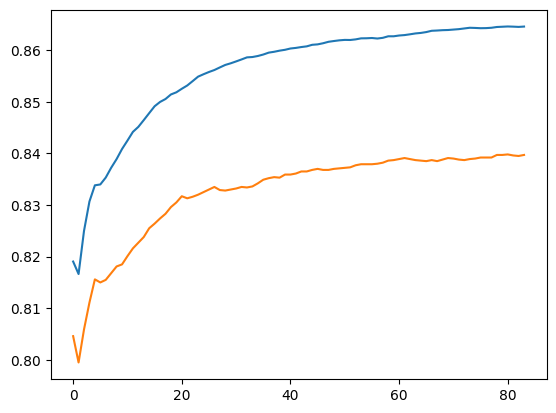

In [48]:
plt.plot(train_score)
plt.plot(test_score)

In [58]:
# 경사하강법
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=20,tol=None, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8501666666666666
0.8248
